# DBSCAN

**D**ensity-**b**ased **s**patial **c**lustering of **a**pplications with **n**oise is a powerful technique which can be used for clustering and outlier detection.

<img src='images/DBSCAN1.png' width='250'>
<img src='images/DBSCAN2.png' width='260'>


- DBSCAN focuses on using density of points as its main factor for assigning cluster labels.
- This creates the ability to find cluster segmentations that other algorithms have difficulty with.
---
DBSCAN Key Hyperparameters:

- Epsilon: $\epsilon$ is Distance extended from a point to search for Minimum Number of Points. Increasing epsilon allows more points to be core points which also results in more border points and less outlier points. Decreasing epsilon causes more points not to be in range of each other, creating more unique clusters. Plot “elbow/knee” diagram comparing epsilon values.
- Minimum Number of Points: Min. Number of Points within Epsilon distance to be a core point (including the point itself). Increasing to a larger number of samples needed to be considered a core point, causes more points to be considered unique outliers. Test multiple potential values and chart against number of outliers labeled.


Adjusting these hyperparameters have two main outcomes:
 - Changing number of clusters
 - Changing what is an outlier point

---
DBSCAN Point Types

<img src='images/DBSCAN3.png' width='250'>
<img src='images/DBSCAN4.png' width='240'>
<img src='images/DBSCAN5.png' width='255'>

---
DBSCAN Procedure:

- Pick a random point not yet assigned.
- For a given $\epsilon$ and $minPoints$: determine the point type -- core / border / outlier.
- Once a core point has been found, add all directly reachable points to the same cluster as core.
- Repeat until all points have been assigned to a cluster or as an outlier.

[Check this online clustering tool](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Datasets_1

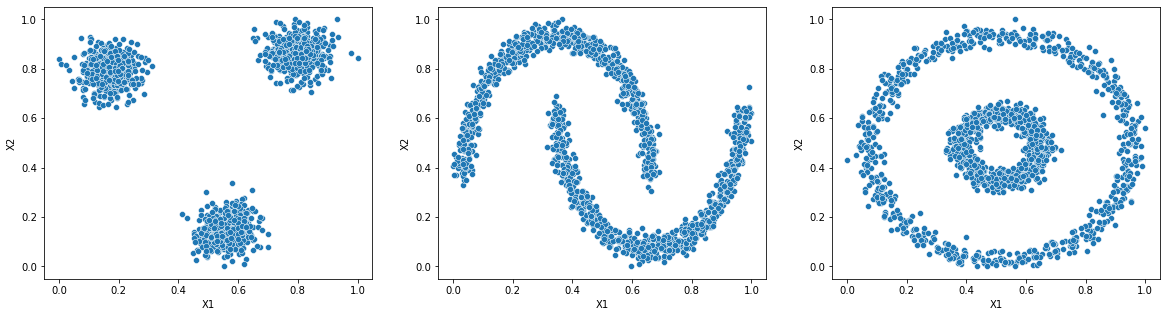

In [2]:
blobs = pd.read_csv('data/cluster_blobs.csv')
moons = pd.read_csv('data/cluster_moons.csv')
circles = pd.read_csv('data/cluster_circles.csv')

from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
blobs = pd.DataFrame(scalar.fit_transform(blobs), columns=blobs.columns)
moons = pd.DataFrame(scalar.fit_transform(moons), columns=moons.columns)
circles = pd.DataFrame(scalar.fit_transform(circles), columns=circles.columns)
datasets_1 = [blobs, moons, circles]

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,5))
sns.scatterplot(data=blobs, x='X1', y='X2',ax=ax[0]);
sns.scatterplot(data=moons, x='X1', y='X2',ax=ax[1]);
sns.scatterplot(data=circles, x='X1', y='X2',ax=ax[2]);

### Helper function

In [3]:
def display_categories(model, datasets):

    fig, ax = plt.subplots(ncols=len(datasets), nrows=1, figsize=(20,5))
    for i in range(len(datasets)):
        labels = model.fit_predict(datasets[i])
        sns.scatterplot(data=datasets[i], x='X1', y='X2', 
                        hue=labels, palette='Set1', ax=ax[i]);

### KMeans

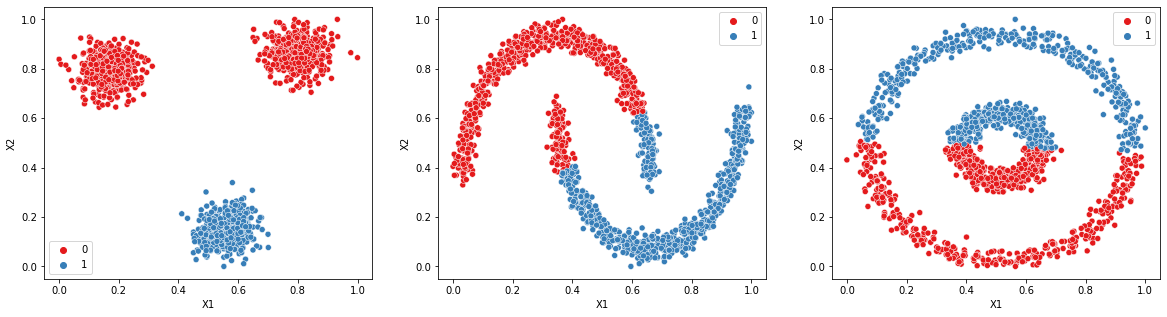

In [4]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
display_categories(model, datasets_1)

### DBSACN

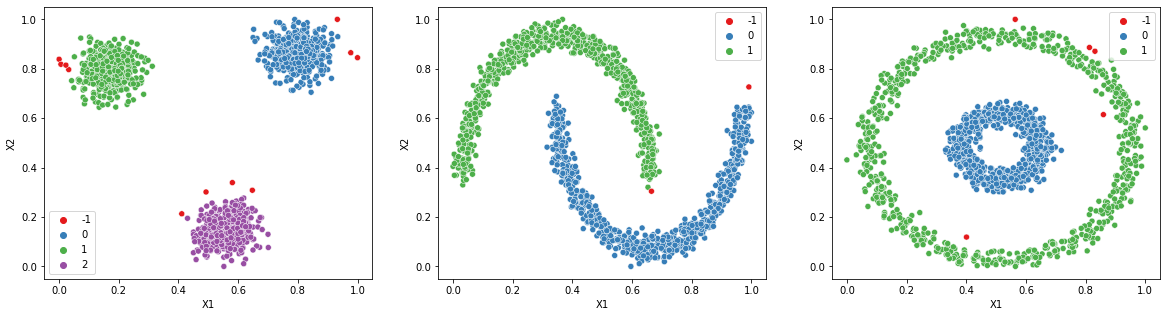

In [5]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.04)
display_categories(model, datasets_1)
# -1 ==> outliers

## Datasets_2

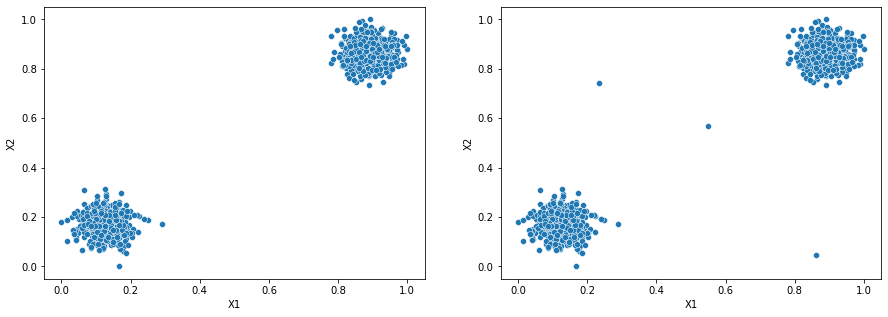

In [6]:
two_blobs = pd.read_csv('data/cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('data/cluster_two_blobs_outliers.csv')

from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
two_blobs = pd.DataFrame(scalar.fit_transform(two_blobs), columns=two_blobs.columns)
two_blobs_outliers = pd.DataFrame(scalar.fit_transform(two_blobs_outliers), columns=two_blobs_outliers.columns)
datasets_2 = [two_blobs, two_blobs_outliers]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
sns.scatterplot(data=two_blobs, x='X1', y='X2',ax=ax[0]);
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2',ax=ax[1]);

### Helper function

In [7]:
def display_categories(model, datasets):

    fig, ax = plt.subplots(ncols=len(datasets), nrows=1, figsize=(15,5))
    for i in range(len(datasets)):
        labels = model.fit_predict(datasets[i])
        sns.scatterplot(data=datasets[i], x='X1', y='X2', 
                        hue=labels, palette='Set1', ax=ax[i]);

### DBSCAN

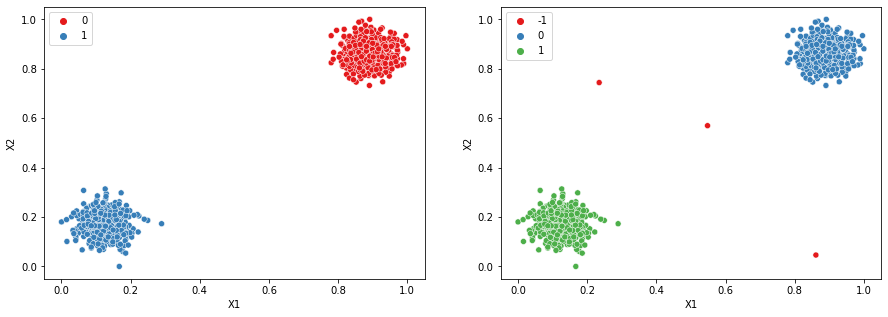

In [8]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3)
display_categories(model, datasets_2)

#### Elbow plot for $\epsilon$

No. of outliers = 3


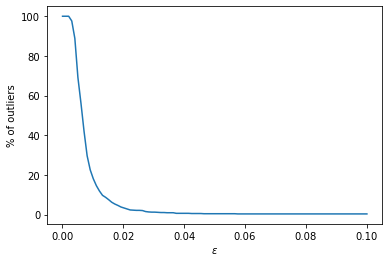

In [9]:
no_of_outliers = []
eps_range = np.linspace(1e-4,0.1,100)

for eps in eps_range:
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)

    outs = np.sum(dbscan.labels_==-1)
    no_of_outliers.append(outs)

outlier_pcnt = np.array(no_of_outliers)/len(two_blobs_outliers) *100

plt.plot(eps_range, outlier_pcnt);
plt.xlabel('$\epsilon$');
plt.ylabel('% of outliers');
print(f"No. of outliers = {outs}")

#### Elbow plot for min_samples

No. of outliers = 519


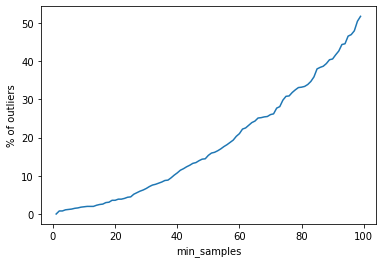

In [19]:
no_of_outliers = []
minNoPts_range = range(1,100)

for s in range(1,100):
    dbscan = DBSCAN(min_samples=s, eps=0.03)
    dbscan.fit(two_blobs_outliers)

    outs = np.sum(dbscan.labels_==-1)
    no_of_outliers.append(outs)

outlier_pcnt = np.array(no_of_outliers)/len(two_blobs_outliers) *100

plt.plot(range(1,100), outlier_pcnt);
plt.xlabel('min_samples');
plt.ylabel('% of outliers');
print(f"No. of outliers = {outs}")

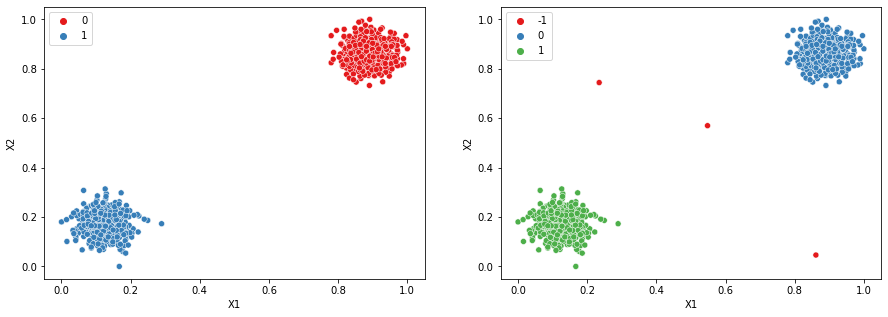

In [23]:
# Recommended min_samples = n*2
min_samples = two_blobs_outliers.shape[1]*2
model = DBSCAN(eps=0.3, min_samples=min_samples)
display_categories(model, datasets_2)